In [23]:
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import numpy as np

#SAABRIIN
#SUPPORT VECTOR MACHINE
def load_the_data(file):
    return np.load(file,mmap_mode='r',allow_pickle=False, fix_imports=True, encoding='ASCII')['arr_0']


train_images = load_the_data("k49-train-imgs.npz")
train_label = load_the_data("k49-train-labels.npz")
test_images = load_the_data("k49-test-imgs.npz")
test_label = load_the_data("k49-test-labels (1).npz")

# i decided to do a 40k split -> 80,20 (since it has already been manually split(assign variable))
train_images = train_images[:32000]
train_label = train_label[:32000]

test_images = test_images[:8000]
test_label = test_label [:8000]


train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

#PCA -> reduce the dimensionality(reduce computation complexity)

pca = PCA(n_components= 60, random_state= 0)
pca.fit_transform(train_images)
pca.transform(test_images)

svm = SVC()
#find perfect c ang gamma 

svm.fit(train_images,train_label)
y_prediction = svm.predict(test_images)
#accs = results(test_label,y_prediction)


In [24]:
accs = results(test_label,y_prediction)
print(accs)

0.7090965017745938


In [ ]:
# finding the c and gamma -> cross validation(this is going to take some time(be prepared))
# you dont have to -> just experimenting
from sklearn.model_selection import GridSearchCV #takes over 5 hours to get a response!
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

parameter = [{"C": [0.5,1,1.5,2,2.5],
            'kernel': ['linear'],
            'gamma': [0.5,0.001,1e-3,1e-4]}]

f1 = f1_score(test_label, y_prediction, average='micro')
scoring = {'Accuracy': 'accuracy'}

grid_result = GridSearchCV(
    SVC(),
    param_grid=parameter,
    n_jobs=-1,
    cv = 5,
    scoring =scoring,
    refit='Accuracy'
    )
train_images = train_images.reshape(-1,784)
grid_result.fit(train_images,train_label)
print("Best parameters set found on development set:")
print()
print(grid_result.best_params_)


In [15]:
# svm = SVC(C=0.5,gamma=0.5,kernel='linear')

# # DECIDED NOT TO USE THIS

# svm.fit(train_images,train_label)
# y_prediction = svm.predict(test_images)

Text(452.78000000000003, 0.5, 'true value')

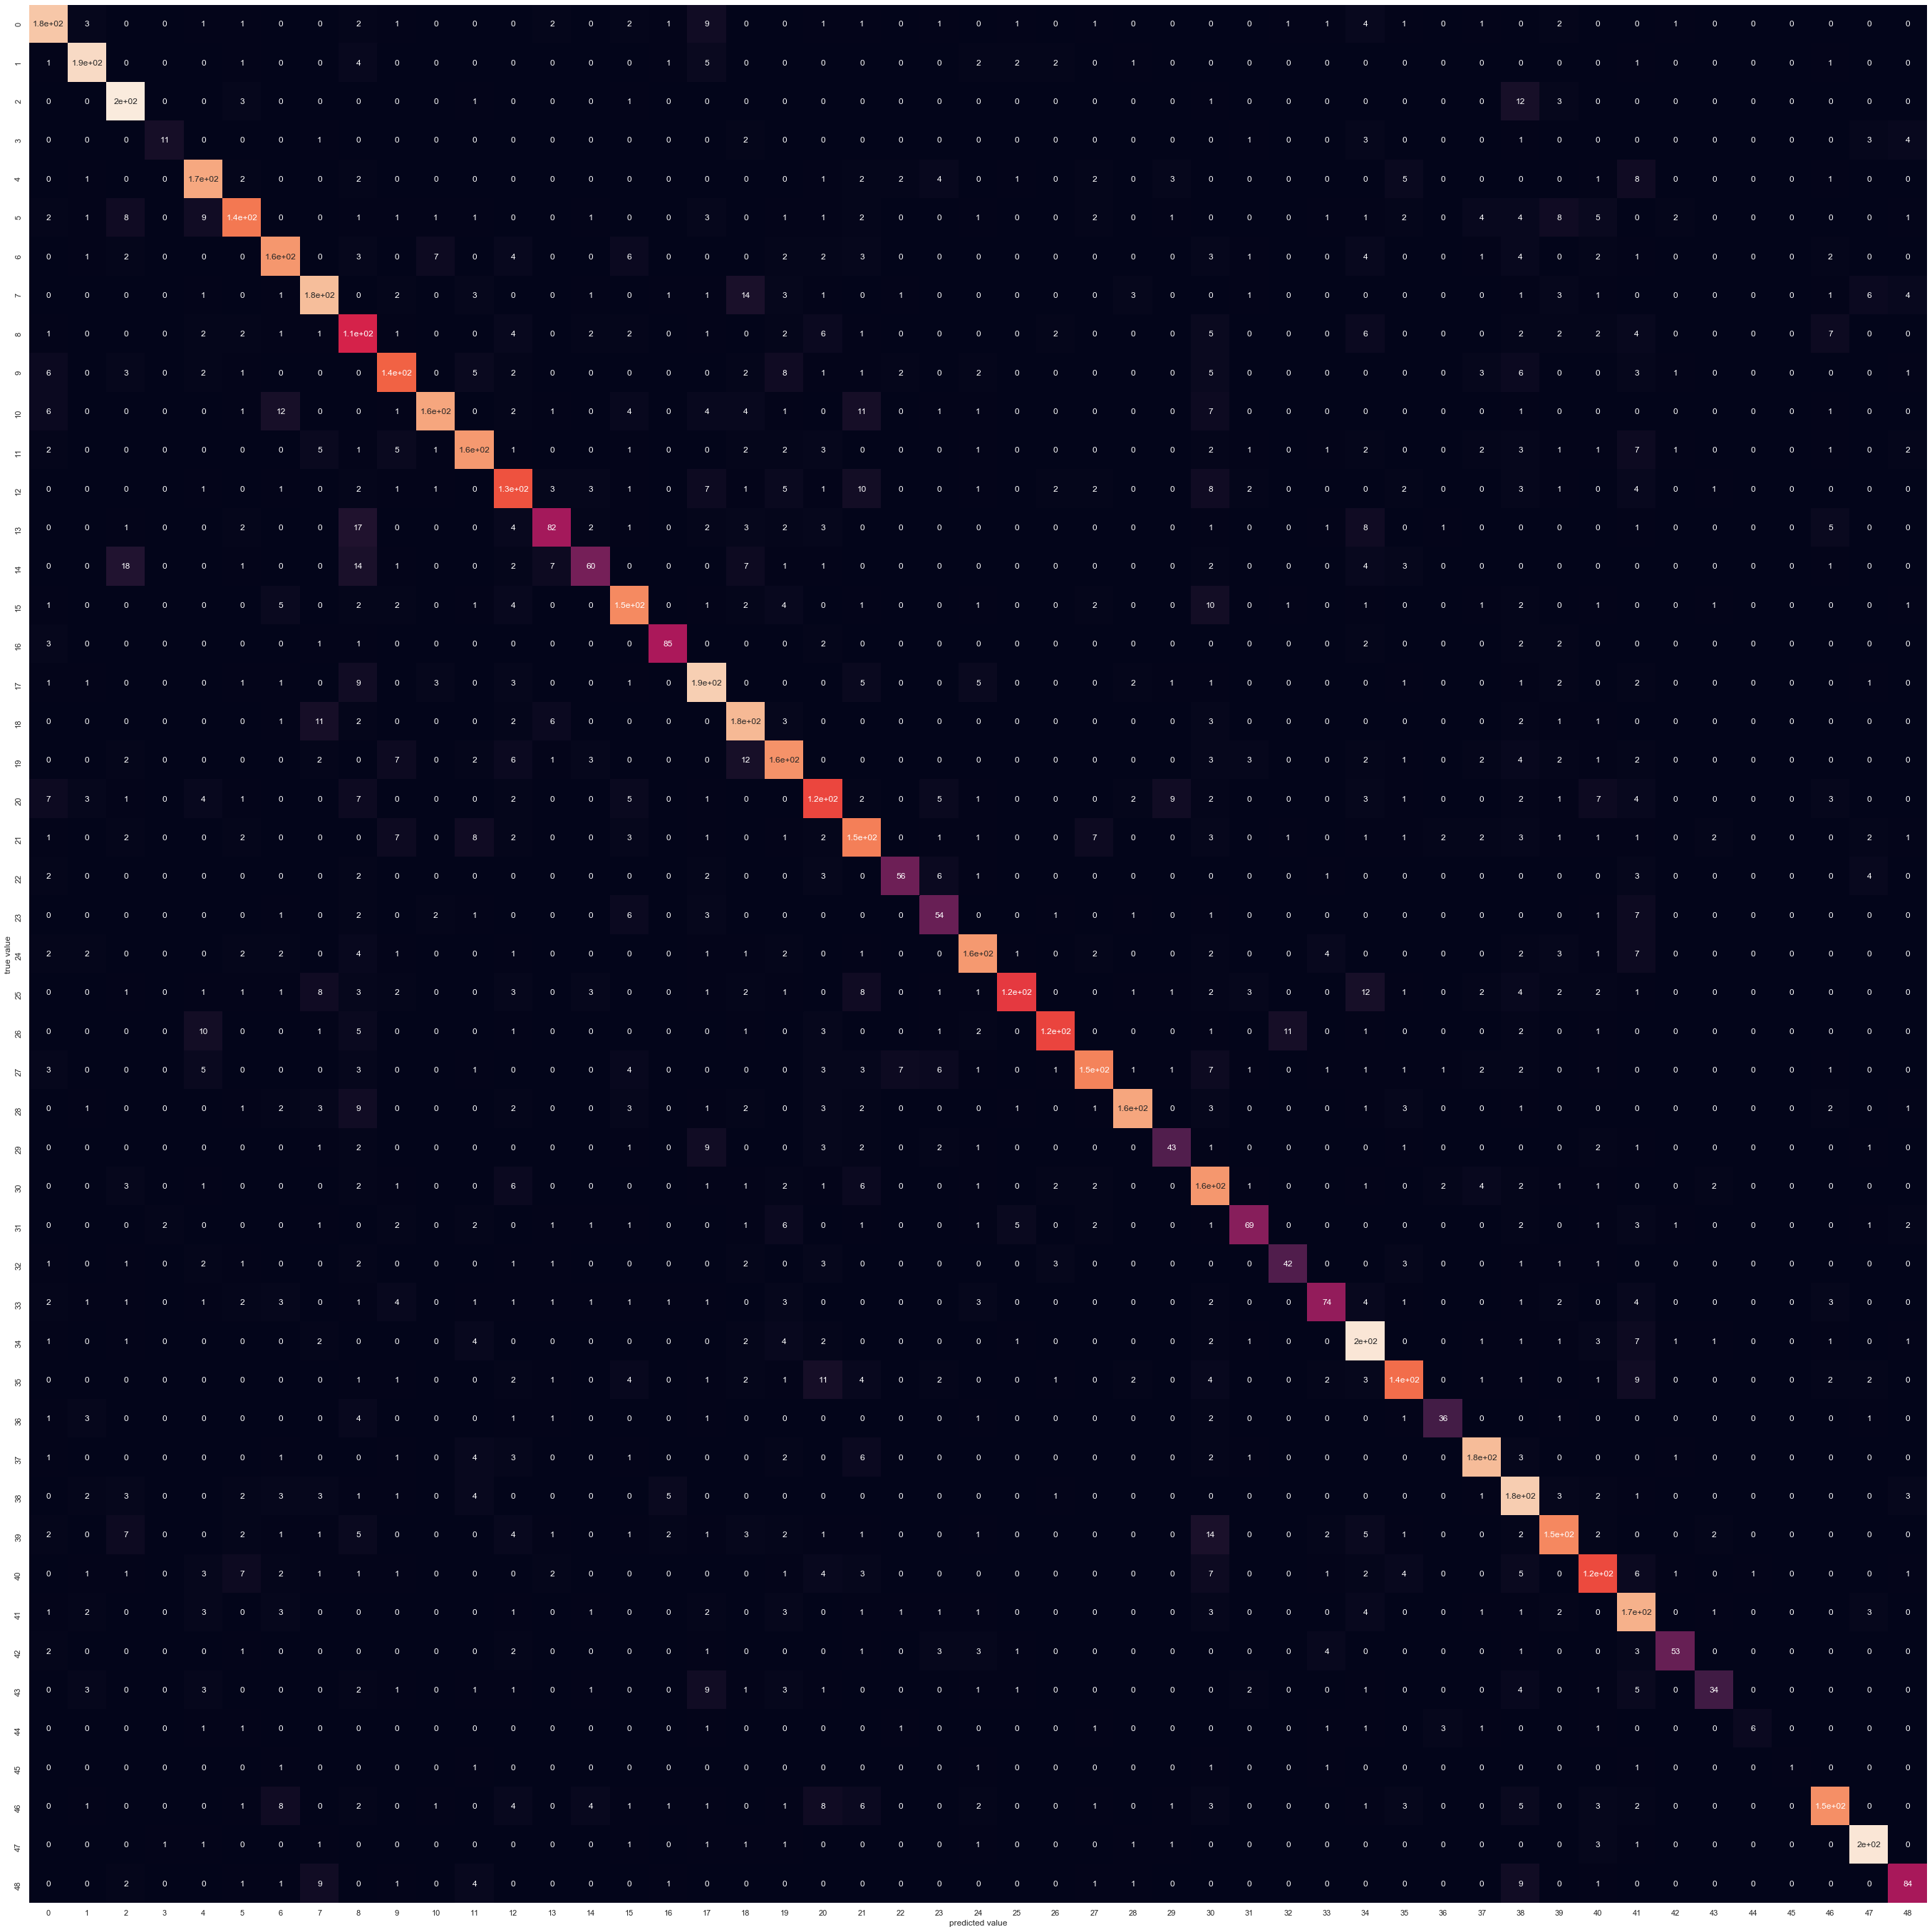

In [25]:
# confusion matrix
cm = confusion_matrix(test_label,y_prediction)
plt.figure(figsize=(49,49))
#here seaborn is used for this larger confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [26]:
# from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#SAAABRIIN

accs = results(test_label,y_prediction)
print(accs)
f1 = f1_score(test_label,y_prediction, average='micro')
precision = precision_score(test_label,y_prediction,average='micro')
recall = recall_score(test_label,y_prediction,average='micro')

print(accs,f1,precision,recall)
print(classification_report(test_label,y_prediction))

0.7090965017745938
0.7090965017745938 0.7515 0.7515 0.7515
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       220
           1       0.88      0.90      0.89       213
           2       0.78      0.91      0.84       222
           3       0.79      0.42      0.55        26
           4       0.76      0.83      0.79       201
           5       0.78      0.69      0.73       208
           6       0.76      0.77      0.76       206
           7       0.77      0.78      0.78       226
           8       0.47      0.65      0.55       162
           9       0.75      0.71      0.73       189
          10       0.91      0.74      0.82       223
          11       0.78      0.77      0.78       207
          12       0.64      0.67      0.66       191
          13       0.75      0.60      0.67       136
          14       0.72      0.49      0.59       122
          15       0.75      0.78      0.76       196
          16       0.8

In [5]:

#Naïve Bayes (NB)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#SAABRIIN

import numpy as np

def load_the_data(file):
    return np.load(file,mmap_mode='r',allow_pickle=False, fix_imports=True, encoding='ASCII')['arr_0']


train_images = load_the_data("k49-train-imgs.npz")
train_label = load_the_data("k49-train-labels.npz")
test_images = load_the_data("k49-test-imgs.npz")
test_label = load_the_data("k49-test-labels (1).npz")

# i decided to do a 40k split -> 80,20 (since it has already been manually split(assign variable))
train_images = train_images[:32000]
train_label = train_label[:32000]

test_images = test_images[:8000]
test_label = test_label [:8000]


train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

Gb = GaussianNB()
Gb.fit(train_images,train_label)

y_predicition = Gb.predict(test_images)

print("Accuracy: ", results(test_label,y_predicition))

f1 = f1_score(test_label,y_predicition,average='micro')
print(f1)
precision = precision_score(test_label,y_predicition,average='micro')
print(precision)
recall = recall_score(test_label,y_predicition,average='micro')
print(recall)


print(classification_report(test_label,y_predicition))

Accuracy:  0.23901264053233204
0.228625
0.228625
0.228625
              precision    recall  f1-score   support

           0       0.26      0.06      0.10       220
           1       0.77      0.66      0.71       213
           2       0.16      0.99      0.27       222
           3       0.07      0.35      0.11        26
           4       0.66      0.48      0.56       201
           5       0.11      0.02      0.03       208
           6       0.16      0.03      0.05       206
           7       0.29      0.01      0.02       226
           8       0.21      0.20      0.20       162
           9       0.47      0.08      0.14       189
          10       0.43      0.14      0.22       223
          11       0.00      0.00      0.00       207
          12       0.00      0.00      0.00       191
          13       0.59      0.46      0.52       136
          14       0.22      0.16      0.19       122
          15       1.00      0.01      0.01       196
          16       0.22

/Users/saabriin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(452.78000000000003, 0.5, 'true value')

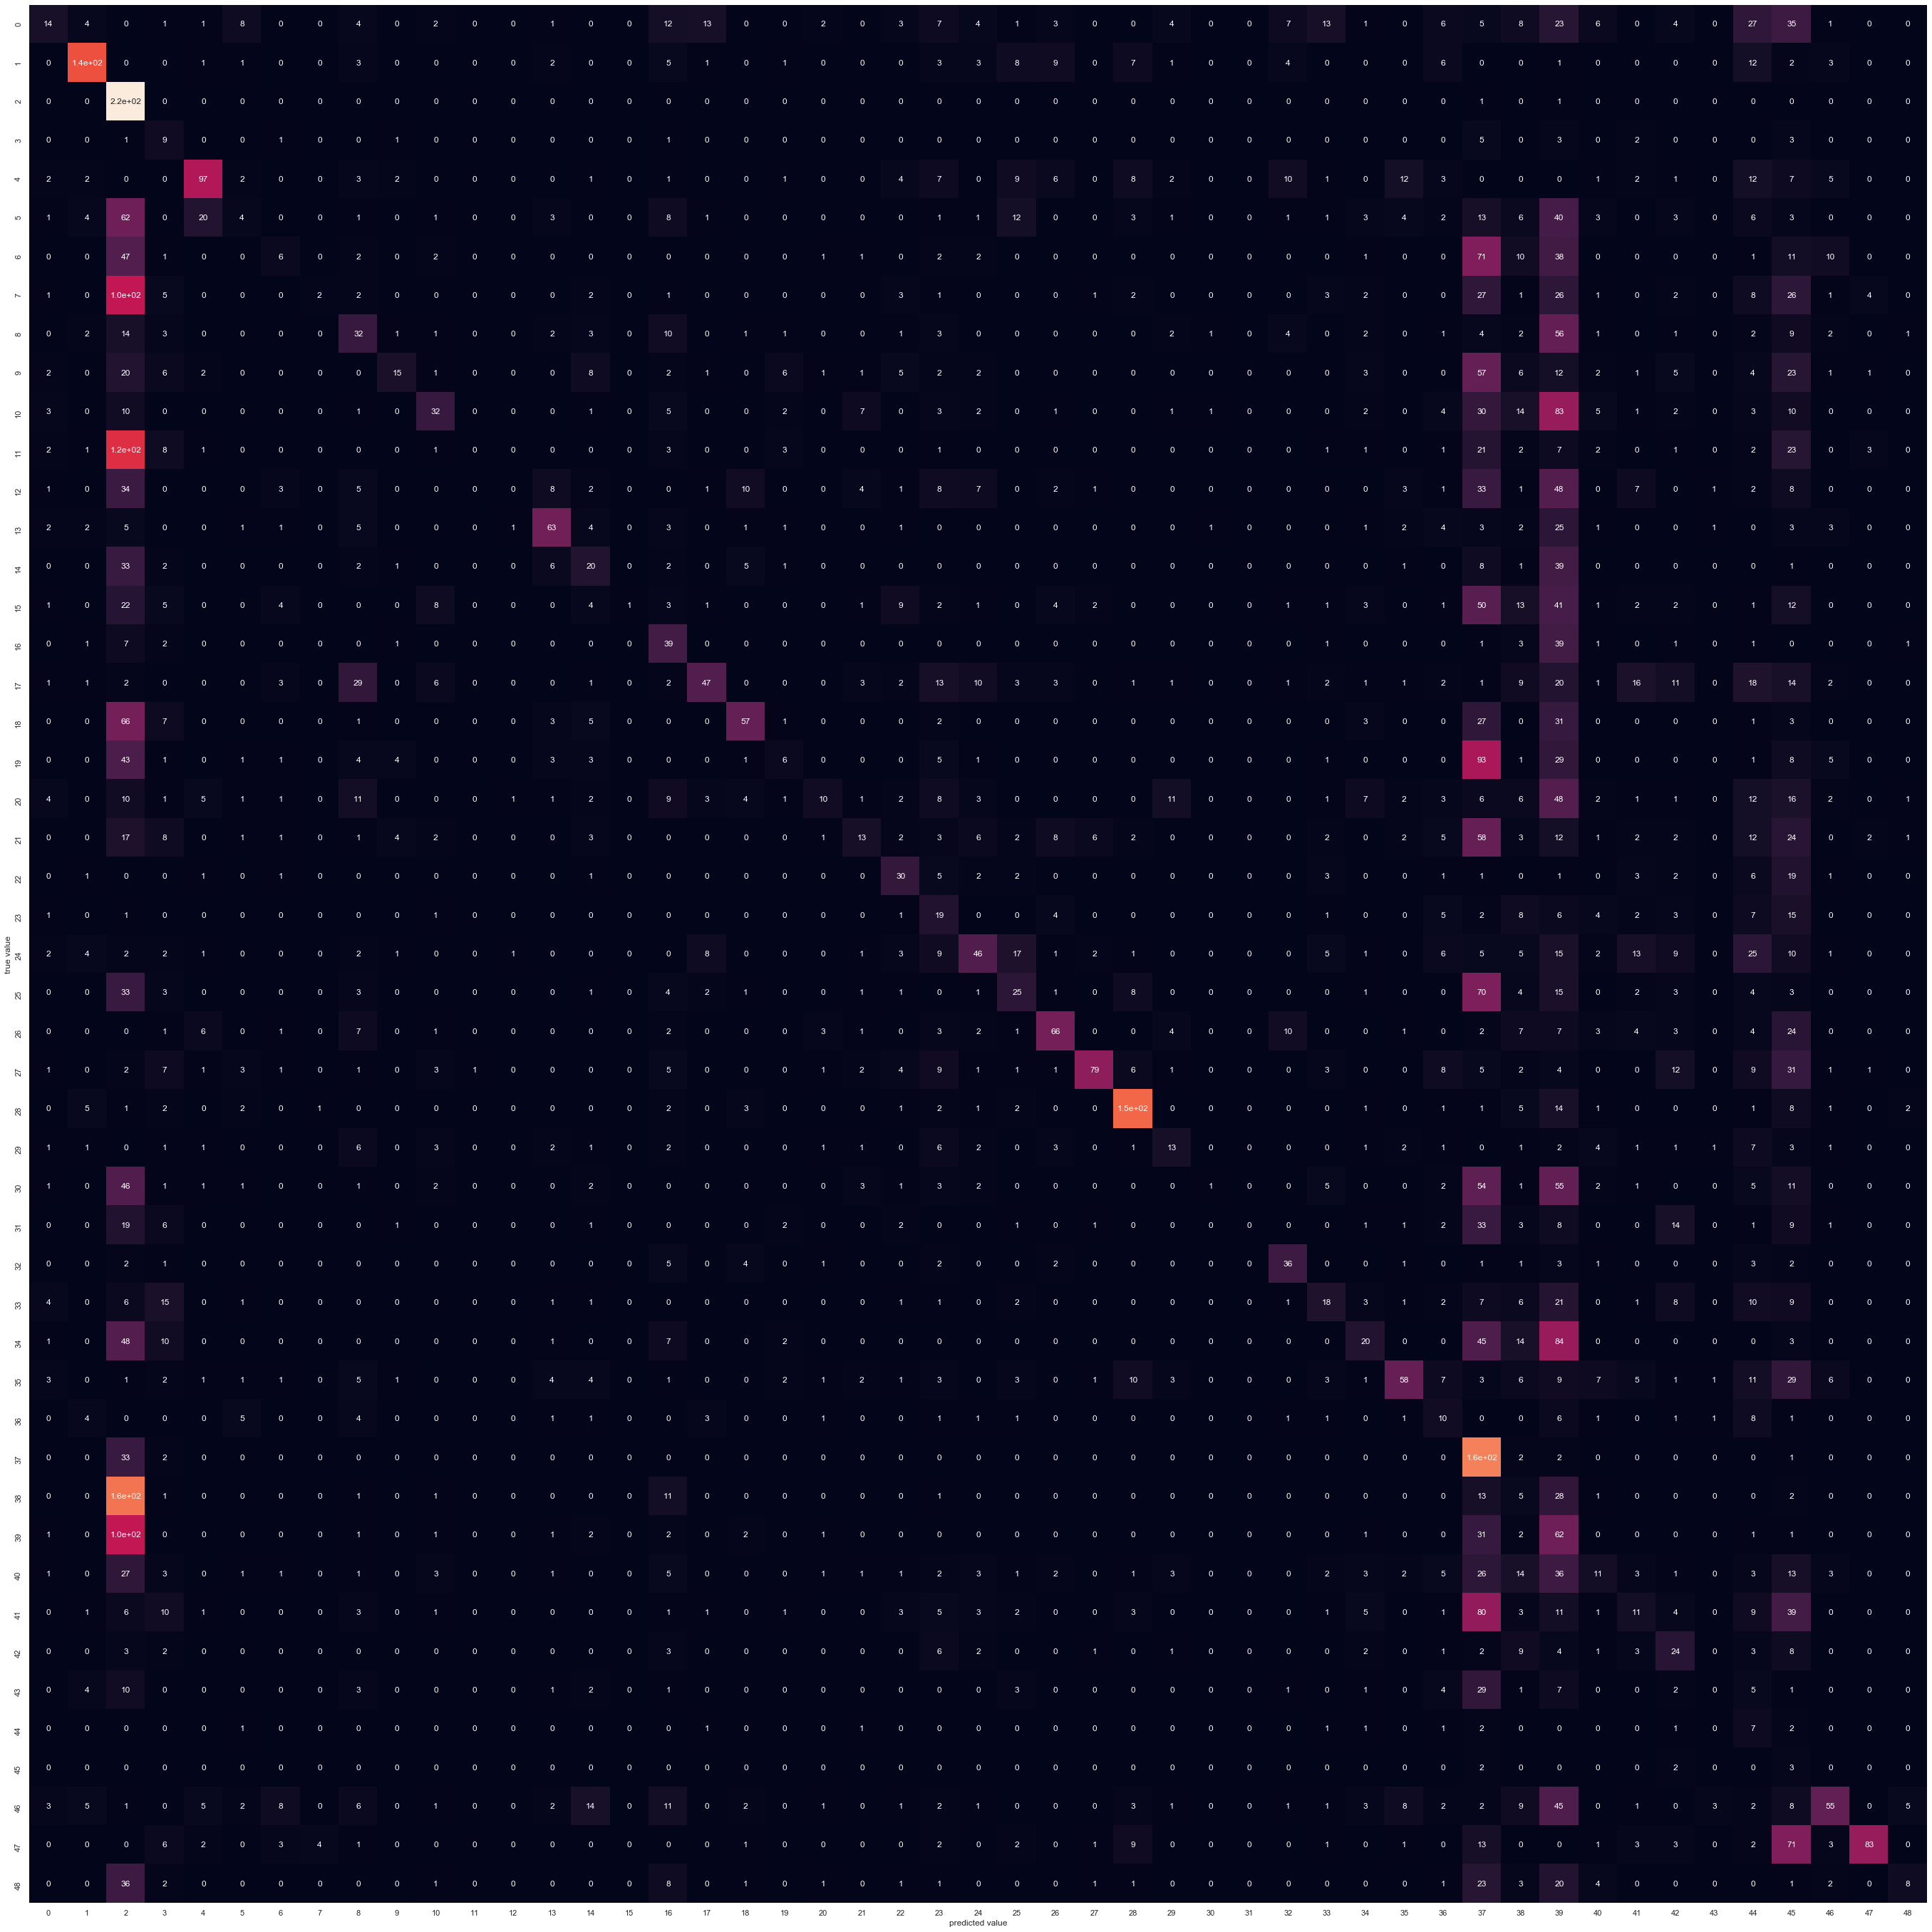

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



cm = confusion_matrix(test_label,y_predicition)
plt.figure(figsize=(49,49))
#here seaborn is used for this larger confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [105]:
# lets look at cnn
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from keras.callbacks import History
from tensorflow.keras import regularizers
#from keras.layers import BatchNormalization

# it changes everytime you run so be careful

def load_the_data(file):
    return np.load(file,mmap_mode='r',allow_pickle=False, fix_imports=True, encoding='ASCII')['arr_0']


#SAABRIIN
train_images = load_the_data("k49-train-imgs.npz")
train_label = load_the_data("k49-train-labels.npz")
test_images = load_the_data("k49-test-imgs.npz")
test_label = load_the_data("k49-test-labels (1).npz")

train_images = train_images.reshape((train_images.shape[0], 28, 28,1))
test_images = test_images.reshape((test_images.shape[0], 28, 28,1))

train_images = train_images/255
test_images = test_images/255

train_images = train_images[:32000]
train_label = train_label[:32000]

test_images = test_images[:8000]
test_label = test_label [:8000]


test_label = keras.utils.to_categorical(test_label,49)


# add learning rate and batch size (possibly batch normalisation)
# batch_size = 
# #BatchNormalization()
#add validation split :0
model =  keras.Sequential([ 
        keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l1(0.01)),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(128, activation="relu"),
        # output layer
        keras.layers.Dense(49, activation="softmax")
        ])

model.compile(optimizer = 'adam' , loss="sparse_categorical_crossentropy", metrics=["accuracy"])
monitor = EarlyStopping(monitor='loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')


model.fit(train_images, train_label,callbacks=[monitor],verbose=1,batch_size=20,epochs=1000)


train_score = model.evaluate(train_images, train_label, verbose=1)
print('Training loss:', train_score[0])
print('Training accuracy:', train_score[1])

Epoch 1/1000
32000/32000 [==============================] - 37s 1ms/sample - loss: 1.2227 - accuracy: 0.7322
Epoch 2/1000
32000/32000 [==============================] - 38s 1ms/sample - loss: 0.6028 - accuracy: 0.8596
Epoch 3/1000
32000/32000 [==============================] - 38s 1ms/sample - loss: 0.4838 - accuracy: 0.8827
Epoch 4/1000
32000/32000 [==============================] - 41s 1ms/sample - loss: 0.4122 - accuracy: 0.9009
Epoch 5/1000
32000/32000 [==============================] - 40s 1ms/sample - loss: 0.3733 - accuracy: 0.9103
Epoch 6/1000
32000/32000 [==============================] - 39s 1ms/sample - loss: 0.3298 - accuracy: 0.9202
Epoch 7/1000
32000/32000 [==============================] - 39s 1ms/sample - loss: 0.3113 - accuracy: 0.9248
Epoch 8/1000
32000/32000 [==============================] - 40s 1ms/sample - loss: 0.2913 - accuracy: 0.9302
Epoch 9/1000
32000/32000 [==============================] - 40s 1ms/sample - loss: 0.2805 - accuracy: 0.9327
Epoch 10/1000
32000

In [89]:
test_label = np.argmax(test_label,axis=1)
test_score = model.evaluate(test_images, test_label, verbose=1)
print("testing loss: " , test_score[0])
print("testing acc: " , test_score[1])

8000/8000 [==============================] - 1s 169us/sample - loss: 1.6992 - accuracy: 0.8432
test_lose:  1.699245952695608
test_acc:  0.84325


In [56]:
# training data is overfitting
y_pred = model.predict(test_images)
print(train_score[1]*100)
print(test_score[1]*100)
test_label = np.argmax(test_label,axis=1)
graph = model.fit(train_images, train_label,callbacks=[monitor],validation_data=(test_images,test_label),verbose=1,batch_size=20,epochs=1000)

99.57812428474426
81.2250018119812
Train on 32000 samples, validate on 8000 samples
Epoch 1/1000
32000/32000 [==============================] - 34s 1ms/sample - loss: 0.0623 - accuracy: 0.9866 - val_loss: 0.8097 - val_accuracy: 0.8830
Epoch 2/1000
32000/32000 [==============================] - 35s 1ms/sample - loss: 0.0629 - accuracy: 0.9864 - val_loss: 0.8767 - val_accuracy: 0.8748
Epoch 3/1000
32000/32000 [==============================] - 38s 1ms/sample - loss: 0.0690 - accuracy: 0.9859 - val_loss: 0.7831 - val_accuracy: 0.8819
Epoch 4/1000
32000/32000 [==============================] - 37s 1ms/sample - loss: 0.0558 - accuracy: 0.9888 - val_loss: 0.8805 - val_accuracy: 0.8800
Epoch 5/1000
32000/32000 [==============================] - 37s 1ms/sample - loss: 0.0603 - accuracy: 0.9877 - val_loss: 0.8183 - val_accuracy: 0.8852
Epoch 6/1000
32000/32000 [==============================] - 37s 1ms/sample - loss: 0.0591 - accuracy: 0.9875 - val_loss: 0.8602 - val_accuracy: 0.8794
Epoch 7/10

Text(452.78000000000003, 0.5, 'true value')

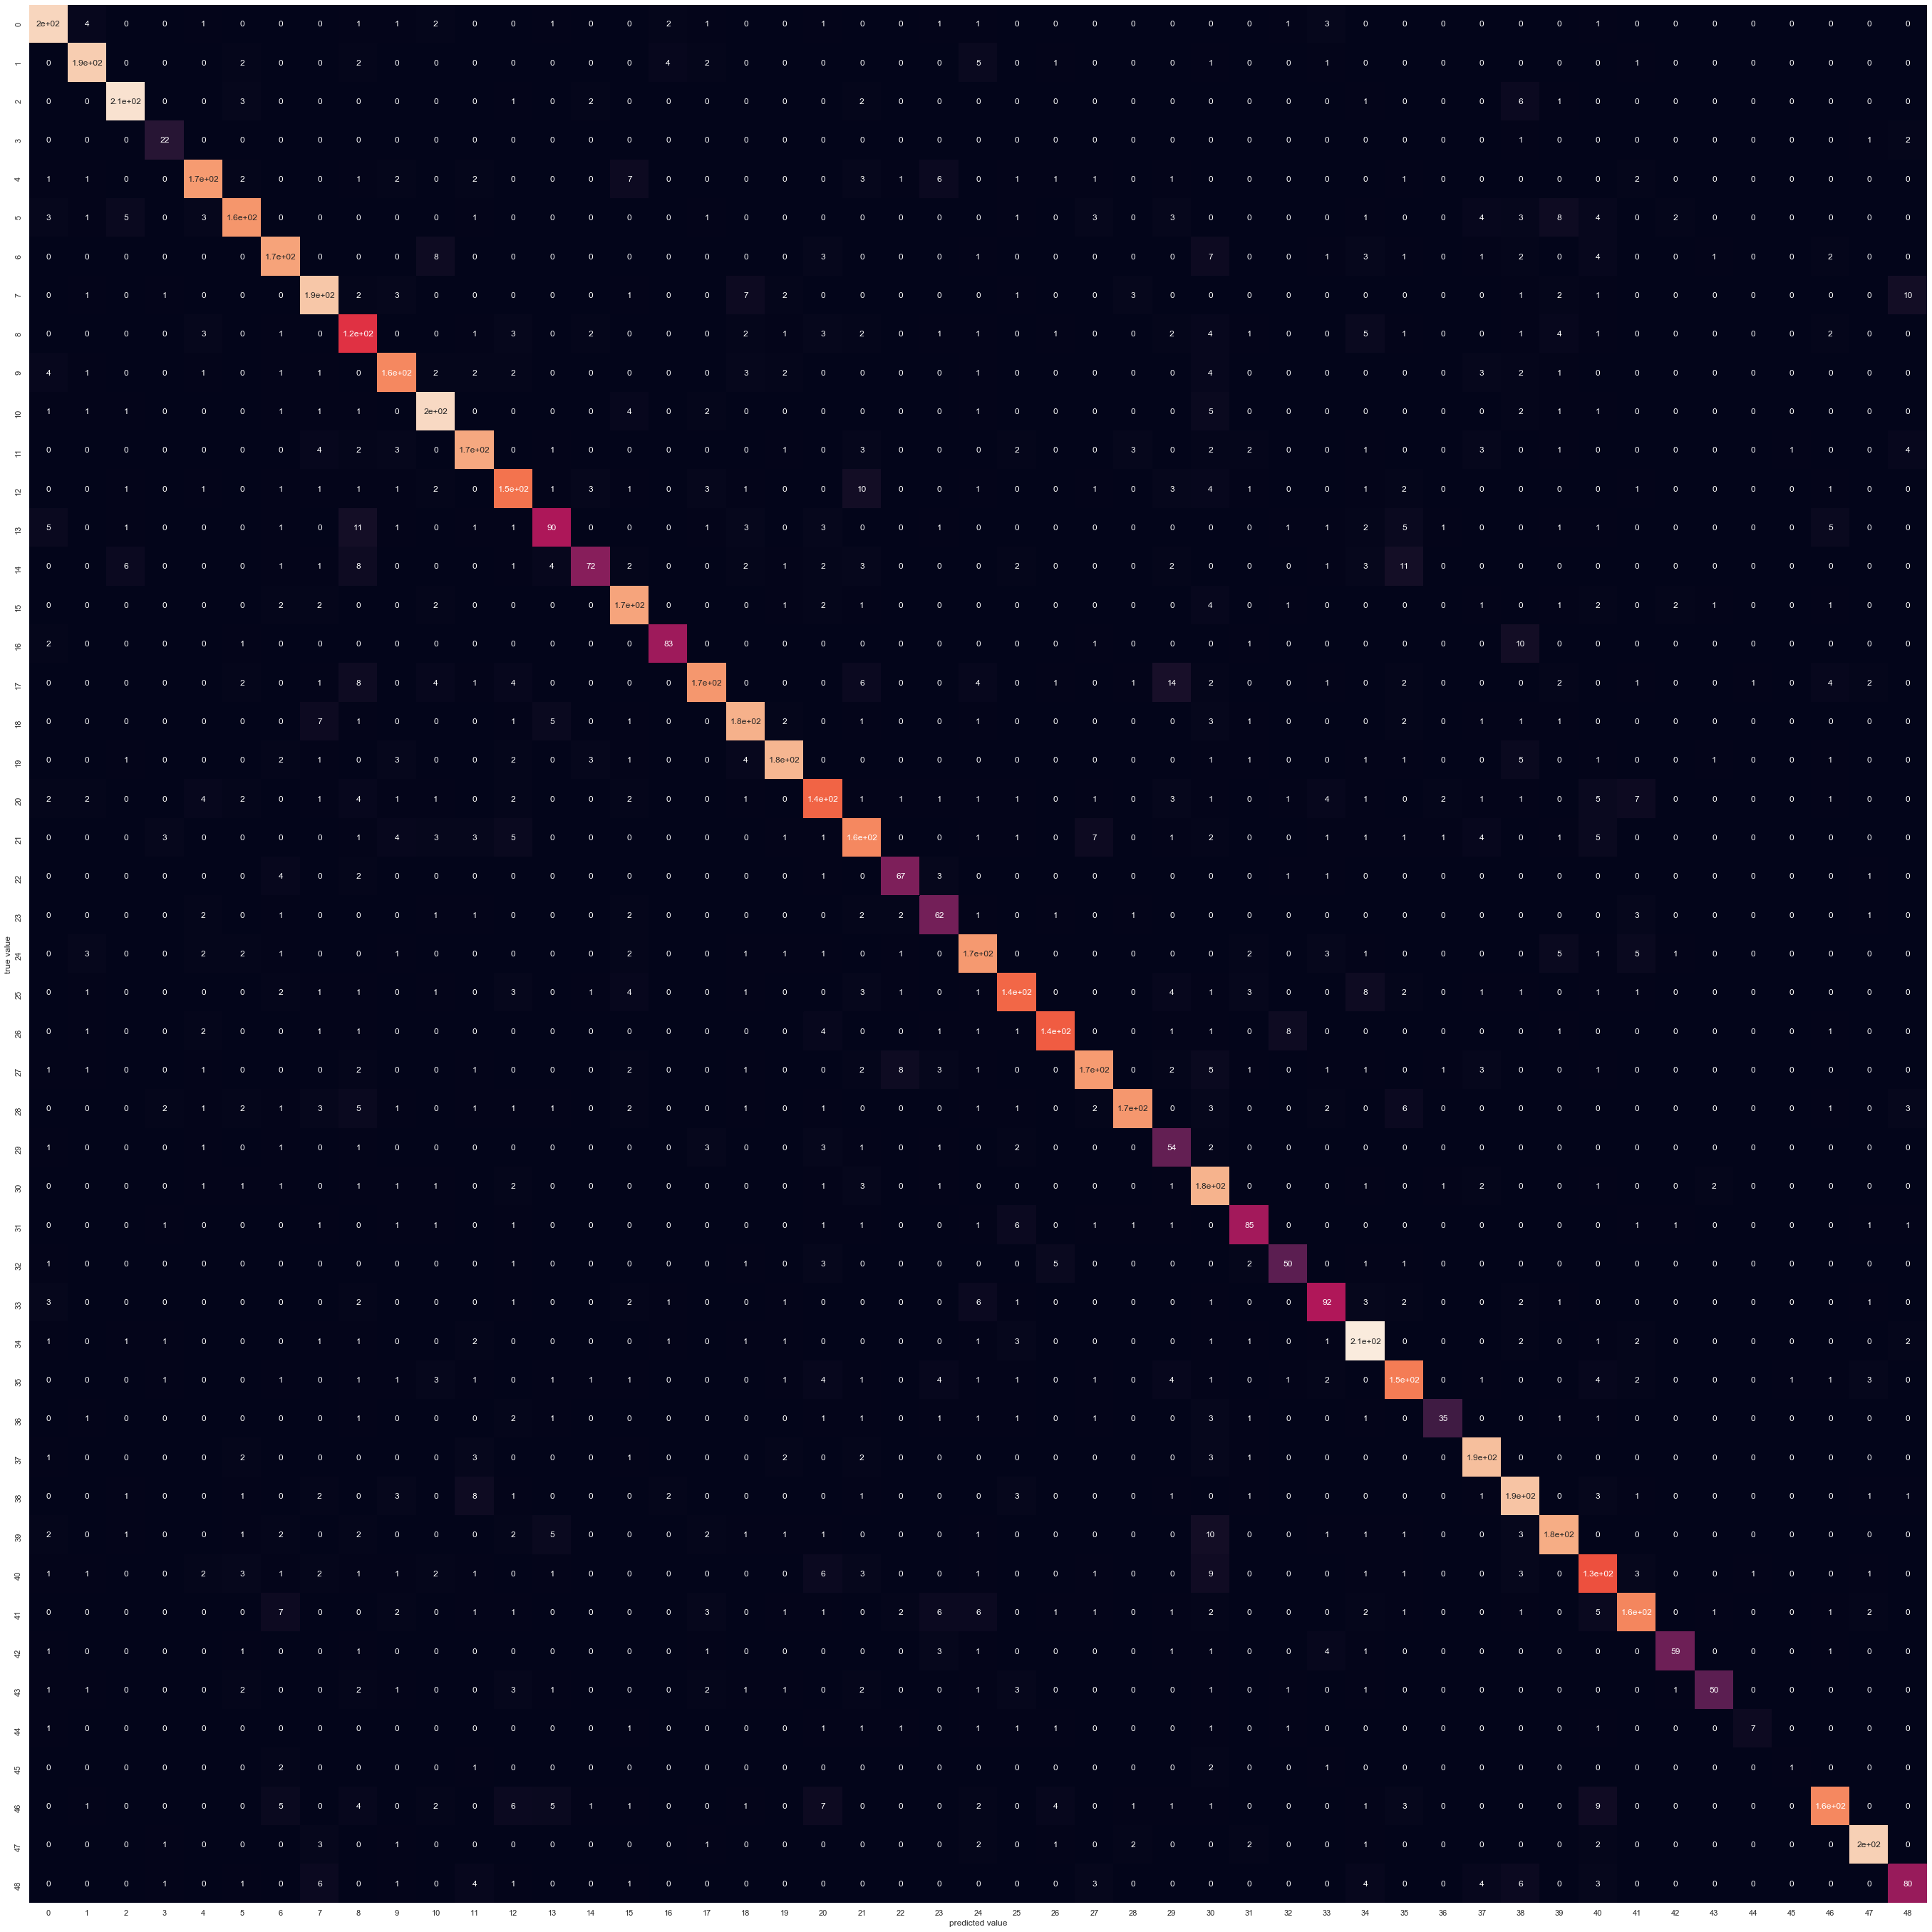

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
Hiragana_characters = ["あ","い","う","え","お","か","き","く","け","こ","さ","し","す","せ","そ","た","ち","つ","て","と","な","に","ぬ","ね",
             "の","は","ひ","ふ","へ","ほ","ま","み","む","め","も","や","ゆ","よ","ら","り","る","れ","ろ","わ","ゐ","ゑ","を", "ん", "ゝ"]

prediction =  model.predict_classes(test_images)

#labels=np.argmax(test_label, axis=1)

cm = confusion_matrix(test_label,prediction)
plt.figure(figsize=(49,49))

#here seaborn is used for this larger confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
# print(cm)

# from sklearn.metrics import classification_report
# print(classification_report(labels,prediction))

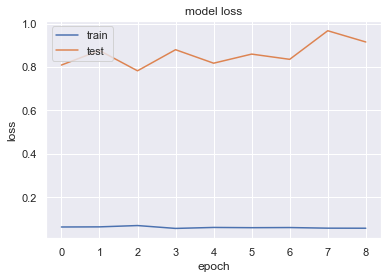

In [59]:
# plot an error curve  -> for training data
#validation -> test (see results)
# i did a graph for accuracy and lose -> for the old model
plt.plot(graph.history['loss'], label='train')
plt.plot(graph.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

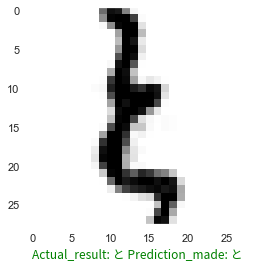

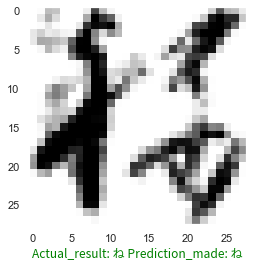

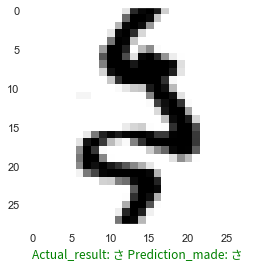

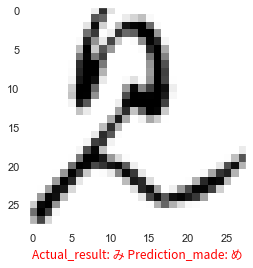

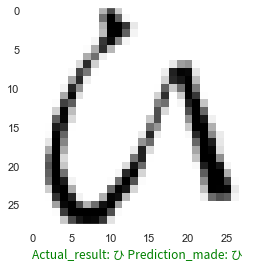

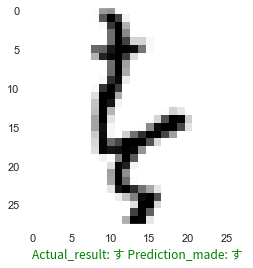

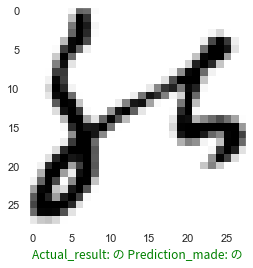

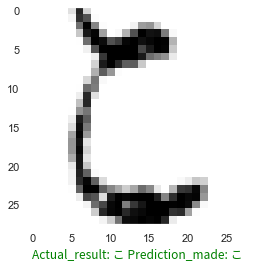

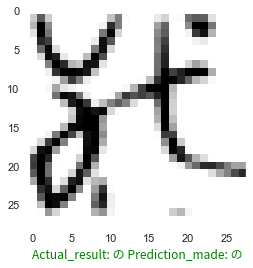

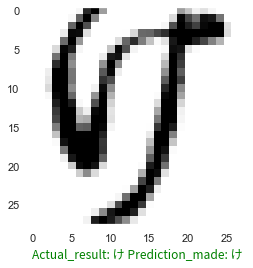

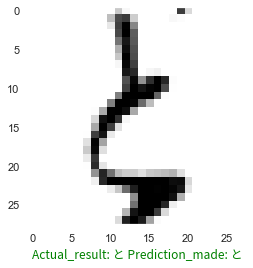

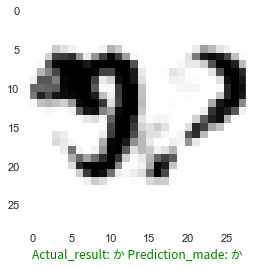

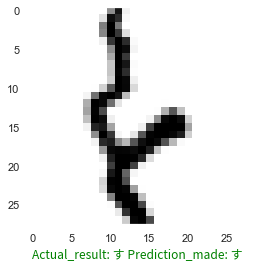

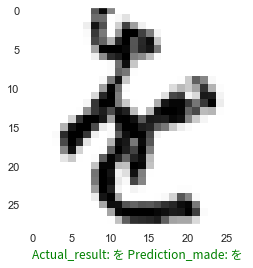

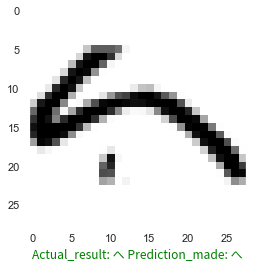

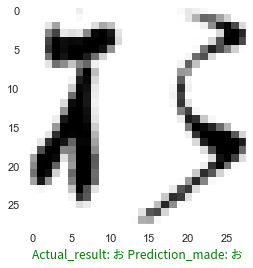

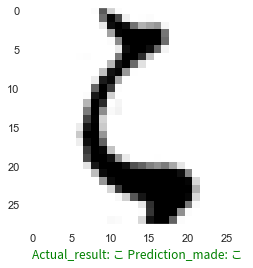

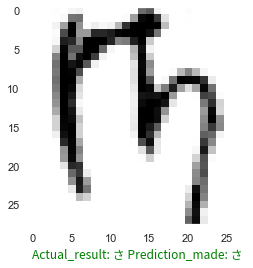

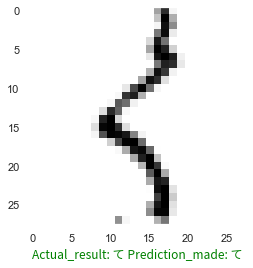

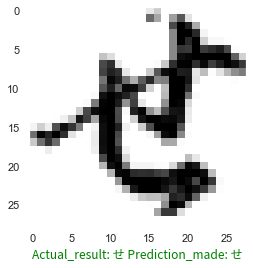

In [120]:
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
fprop = fm.FontProperties(fname='NotoSansCJKtc-Regular.otf')
Hiragana_characters= ["あ","い","う","え","お","か","き","く","け","こ","さ","し","す","せ","そ","た","ち","つ","て","と","な","に","ぬ","ね",
             "の","は","ひ","ふ","へ","ほ","ま","み","む","め","も","や","ゆ","よ","ら","り","る","れ","ろ","わ","ゐ","ゑ","を", "ん", "ゝ"]

pred = model.predict(test_images)

train_images = train_images.reshape((train_images.shape[0], 28, 28))
imageY = test_images.reshape((test_images.shape[0], 28, 28))

#test_label=np.argmax(test_label, axis=1)
for i in range(20):
    plt.grid(False)   
    plt.imshow(imageY [i], cmap= plt.cm.binary)
    plt.xlabel("Actual_result: " + Hiragana_characters[test_label[i]] + " " + "Prediction_made: " + Hiragana_characters[np.argmax(pred[i])], fontproperties=fprop)
    if (Hiragana_characters[test_label[i]] == Hiragana_characters[np.argmax(pred[i])]):
            plt.xlabel("Actual_result: " + Hiragana_characters[test_label[i]] + " " + "Prediction_made: " + Hiragana_characters[np.argmax(pred[i])], fontproperties=fprop, color='green')
    else :
        plt.xlabel("Actual_result: " + Hiragana_characters[test_label[i]] + " " + "Prediction_made: " + Hiragana_characters[np.argmax(pred[i])], fontproperties=fprop, color='red')
    plt.show()

In [72]:
# lets look at cnn

# for baseline for cnn
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from keras.callbacks import History
from tensorflow.keras import regularizers


def load_the_data(file):
    return np.load(file,mmap_mode='r',allow_pickle=False, fix_imports=True, encoding='ASCII')['arr_0']



train_images = load_the_data("k49-train-imgs.npz")
train_label = load_the_data("k49-train-labels.npz")
test_images = load_the_data("k49-test-imgs.npz")
test_label = load_the_data("k49-test-labels (1).npz")

train_images = train_images.reshape((train_images.shape[0], 28, 28,1))
test_images = test_images.reshape((test_images.shape[0], 28, 28,1))

train_images = train_images/255
test_images = test_images/255

train_images = train_images[:32000]
train_label = train_label[:32000]

test_images = test_images[:8000]
test_label = test_label [:8000]


test_labels = keras.utils.to_categorical(test_label, 50)


# add learning rate and batch size (possibly batch normalisation)
# batch_size = 
# #BatchNormalization()
#add validation split :0
model =  keras.Sequential([ 
        keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Dropout(0.2),
        #keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        # output layer
        keras.layers.Dense(49, activation="softmax")
        ])

model.compile(optimizer = 'adam' , loss="sparse_categorical_crossentropy", metrics=["accuracy"])
monitor = EarlyStopping(monitor='loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')



model.fit(train_images, train_label,callbacks=[monitor],epochs=20)



Epoch 1/20
32000/32000 [==============================] - 8s 252us/sample - loss: 1.2346 - accuracy: 0.6848
Epoch 2/20
32000/32000 [==============================] - 8s 259us/sample - loss: 0.5717 - accuracy: 0.8445
Epoch 3/20
32000/32000 [==============================] - 8s 254us/sample - loss: 0.3927 - accuracy: 0.8908
Epoch 4/20
32000/32000 [==============================] - 8s 253us/sample - loss: 0.2866 - accuracy: 0.9175
Epoch 5/20
32000/32000 [==============================] - 8s 252us/sample - loss: 0.2174 - accuracy: 0.9363
Epoch 6/20
32000/32000 [==============================] - 8s 262us/sample - loss: 0.1673 - accuracy: 0.9502
Epoch 7/20
32000/32000 [==============================] - 9s 272us/sample - loss: 0.1349 - accuracy: 0.9596
Epoch 8/20
32000/32000 [==============================] - 9s 277us/sample - loss: 0.1042 - accuracy: 0.9688
Epoch 9/20
32000/32000 [==============================] - 9s 272us/sample - loss: 0.0948 - accuracy: 0.9693
Epoch 10/20
32000/32000 [===

In [73]:
#test_label = np.argmax(test_label,axis=1)
graph = model.fit(train_images, train_label,callbacks=[monitor],validation_data=(test_images,test_label),verbose=1,batch_size=20,epochs=20)

Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 12s 385us/sample - loss: 0.0479 - accuracy: 0.9833 - val_loss: 1.5178 - val_accuracy: 0.8019
Epoch 2/20
32000/32000 [==============================] - 12s 375us/sample - loss: 0.0412 - accuracy: 0.9858 - val_loss: 1.4842 - val_accuracy: 0.8046
Epoch 3/20
32000/32000 [==============================] - 12s 381us/sample - loss: 0.0369 - accuracy: 0.9879 - val_loss: 1.6016 - val_accuracy: 0.7974
Epoch 4/20
32000/32000 [==============================] - 12s 386us/sample - loss: 0.0345 - accuracy: 0.9887 - val_loss: 1.6092 - val_accuracy: 0.7965
Epoch 5/20
32000/32000 [==============================] - 12s 388us/sample - loss: 0.0345 - accuracy: 0.9881 - val_loss: 1.5996 - val_accuracy: 0.8091
Epoch 6/20
32000/32000 [==============================] - 11s 356us/sample - loss: 0.0315 - accuracy: 0.9894 - val_loss: 1.5658 - val_accuracy: 0.8098
Epoch 7/20
32000/32000 [=====================

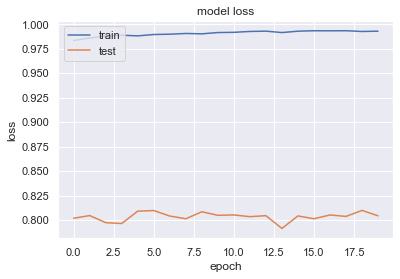

In [74]:
plt.plot(graph.history['accuracy'], label='train')
plt.plot(graph.history['val_accuracy'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [119]:
pred = model.predict_classes(test_images)
#pred = pred[:, 0]

#test_label = np.argmax(test_label,axis=1)

f1 = f1_score(test_label,pred,average='micro')
print(f1)
precision = precision_score(test_label,pred,average='micro')
print(precision)
recall = recall_score(test_label,pred,average='micro')
print(recall)

#classification_report(test_label,pred)

0.854125
0.854125
0.854125


In [118]:
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       220
           1       0.94      0.93      0.94       213
           2       0.86      0.94      0.90       222
           3       0.87      0.77      0.82        26
           4       0.85      0.89      0.87       201
           5       0.76      0.83      0.79       208
           6       0.89      0.85      0.87       206
           7       0.88      0.84      0.86       226
           8       0.74      0.85      0.79       162
           9       0.83      0.83      0.83       189
          10       0.94      0.84      0.89       223
          11       0.94      0.81      0.87       207
          12       0.88      0.75      0.81       191
          13       0.91      0.70      0.79       136
          14       0.82      0.61      0.70       122
          15       0.82      0.93      0.87       196
          16       0.90      0.92      0.91        98
          17       0.82    